In [62]:
import tensorflow as tf
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import talib
import numpy as np
import data as ds
import common as common
import os as os

In [63]:
data_source = ds.DataSource()

In [64]:
# 股價
codes1 = ['hsi', '02800', '03033']
data1 = data_source.get_data(codes1)

In [65]:
# 基本面
data2 = data_source.get_performance(['01766'])
for k, df in data2.items():
    path_data = os.path.abspath(os.path.join('data', 'hk-stock', k+'.csv'))
    data2[k].to_csv(path_data)

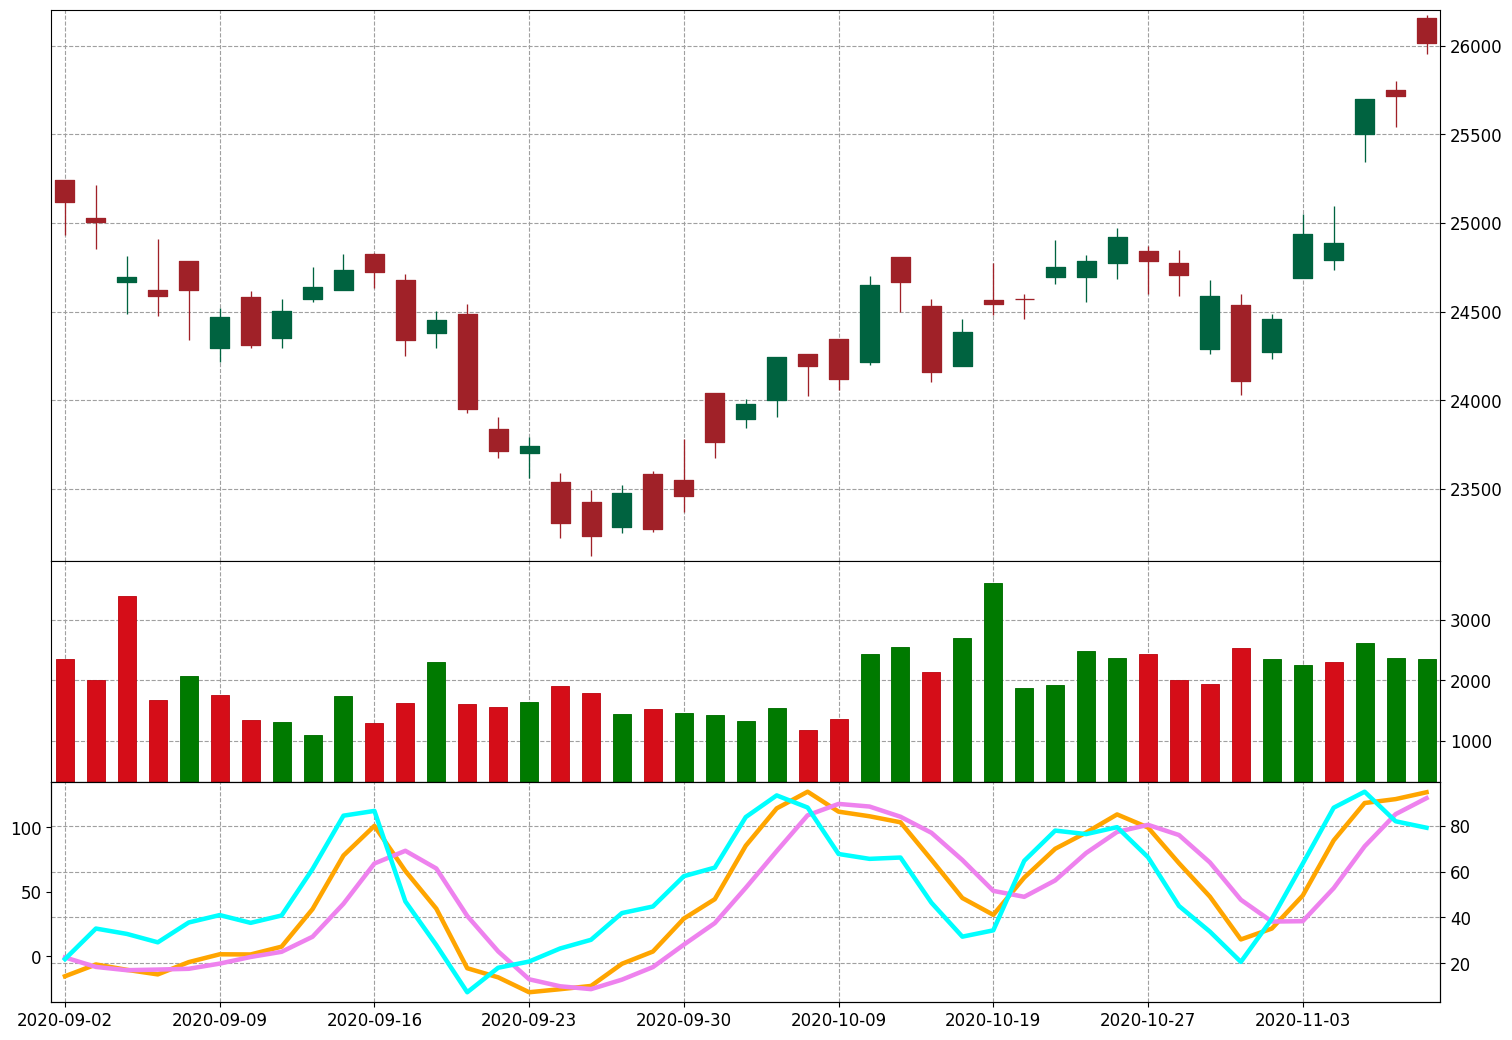

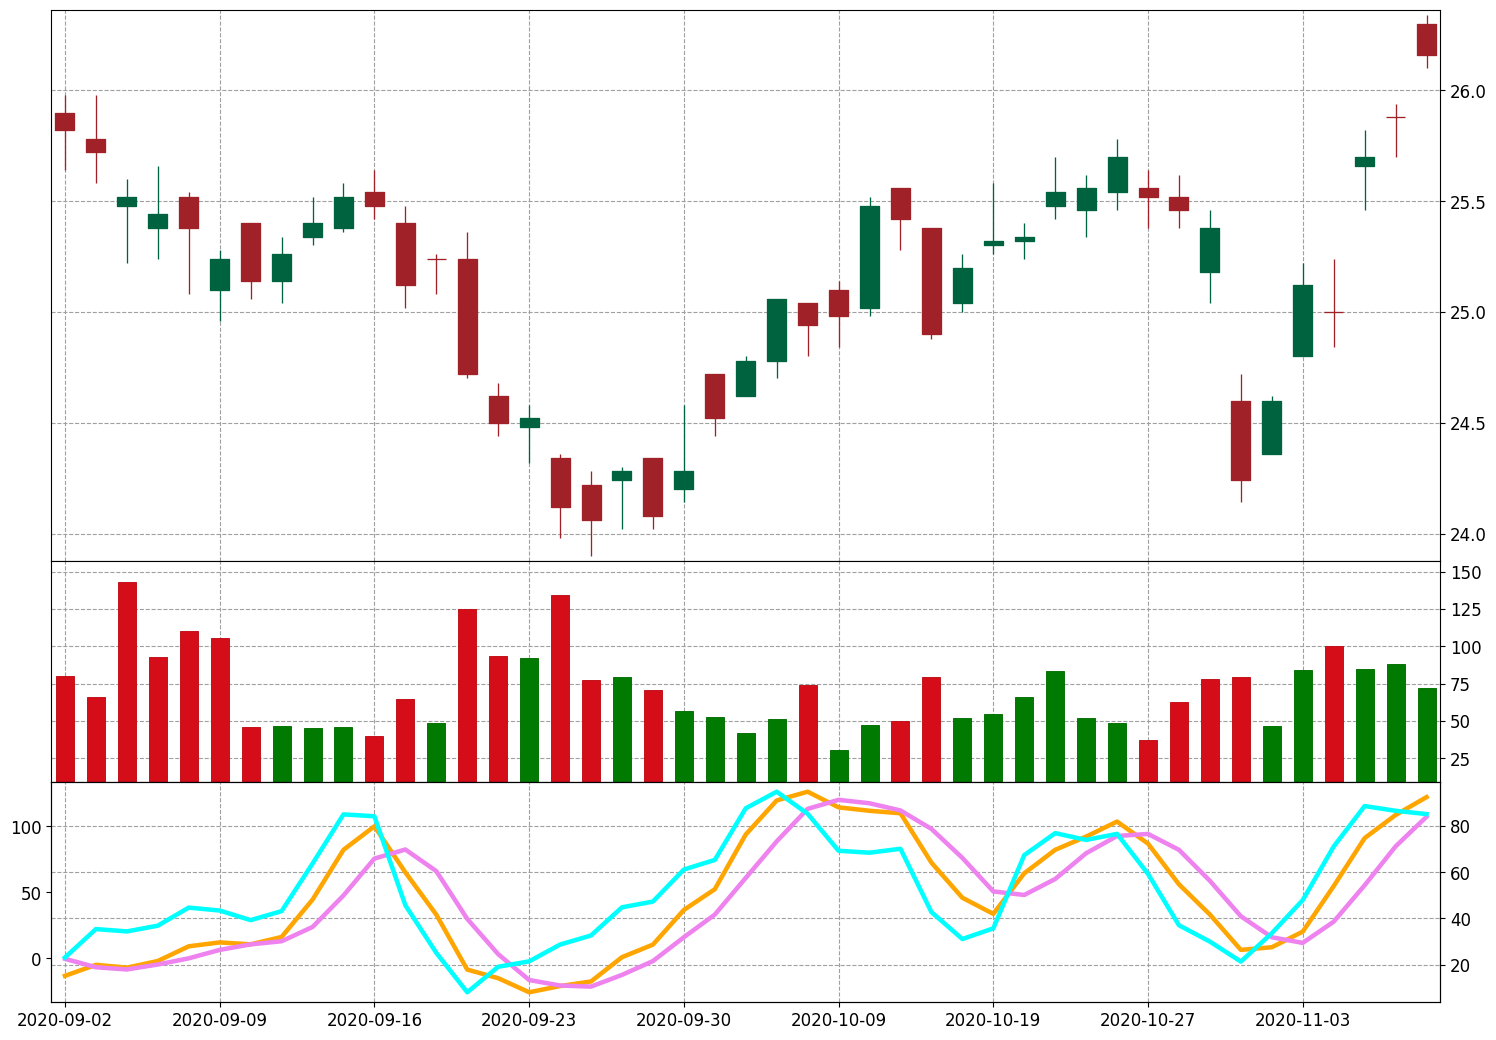

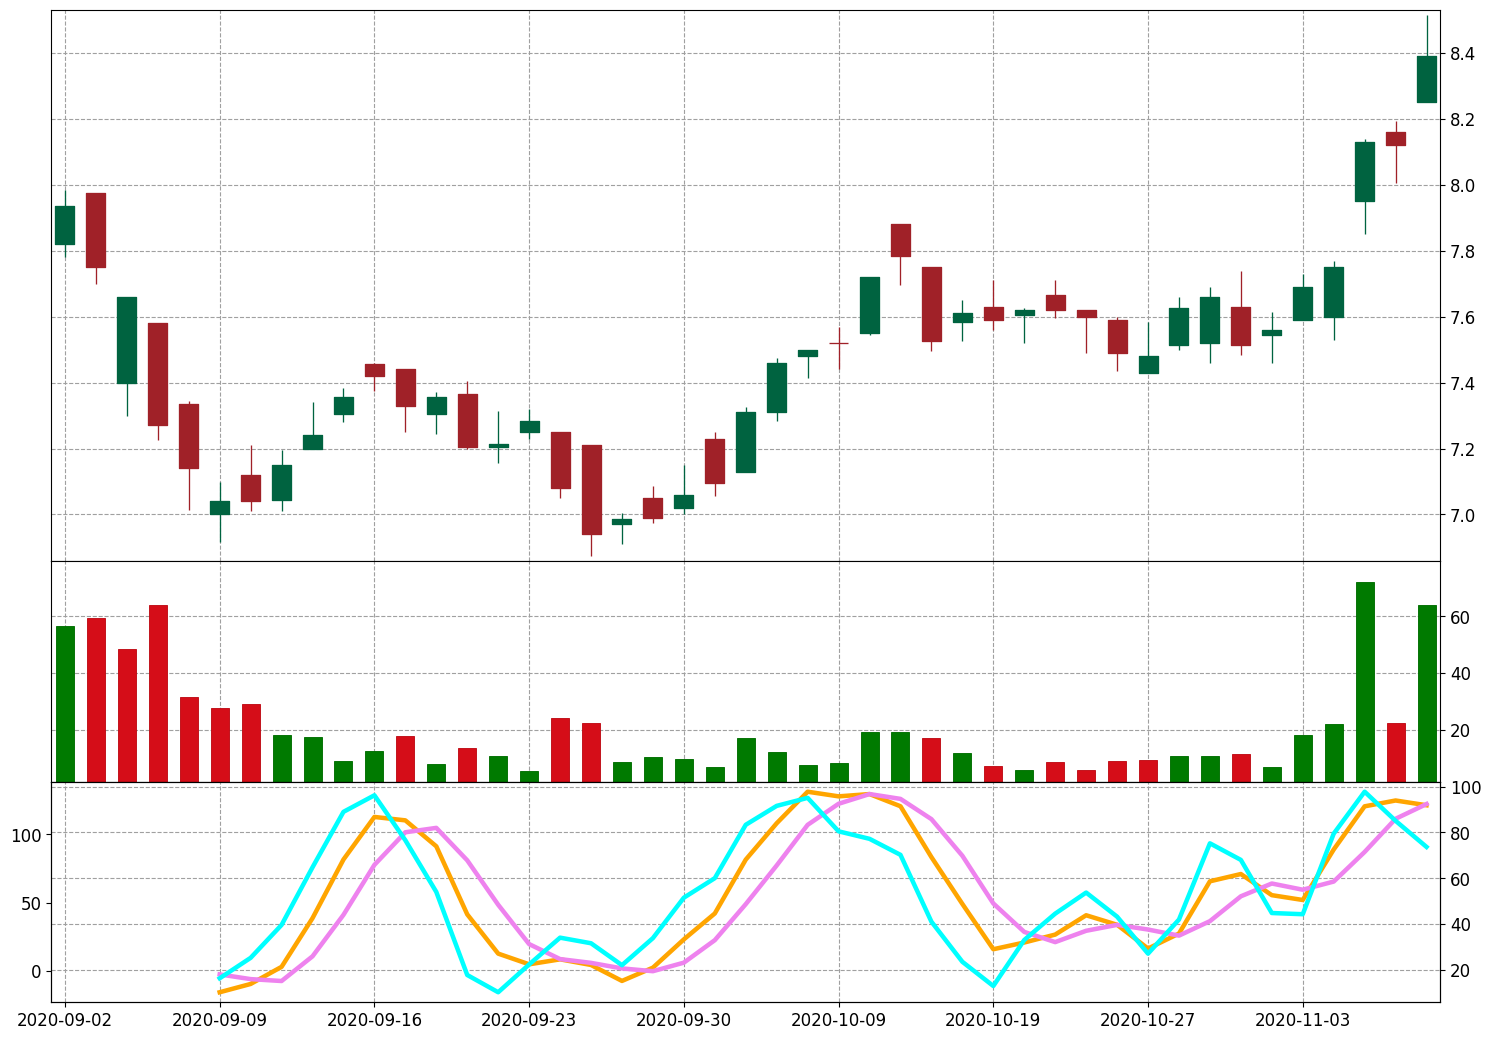

In [66]:
# K线图
for k, _df in data1.items():
    df = _df.copy(deep=True)
    df.fillna(0, inplace=True)
    # 清
    df.columns = ['code', 'lot', 'nmll', 'sdate', 'High', 'Low', 'Open', 'Close', 'Volume']
    df["Volume"] = pd.to_numeric(df["Volume"])
    df["Volume"] =  df["Volume"]/1000000
    df.index = pd.to_datetime(df.sdate)
    
    # 技术指标
    close = np.array(df['Close'], dtype='float')
    open = np.array(df['Open'], dtype='float')
    high = np.array(df['High'], dtype='float')
    low = np.array(df['Low'], dtype='float')
    vol = np.array(df['Volume'], dtype='float')
    
    df['rsi14'] = talib.RSI(close, timeperiod=14)
    df['sma10'] = talib.SMA(close, timeperiod=10)
    df['k'], df['d'], df['j'] = common.kdj(high, low, close, window_size=1)
    
    df = df.tail(45)
    style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size':12}, gridaxis='both')
    apds = [mpf.make_addplot(df['k'], panel=2, color='orange', linestyle='solid'),
            mpf.make_addplot(df['d'], panel=2, color='violet', linestyle='solid'),
            mpf.make_addplot(df['j'], panel=2, color='aqua', linestyle='solid')]
    mpf.plot(df, type='candle', addplot=apds, style=style, ylabel='', ylabel_lower='',
             volume=True, figscale=2, xrotation=0, datetime_format="%Y-%m-%d", show_nontrading=False, tight_layout=True,
             scale_width_adjustment=dict(volume=0.6,candle=1))

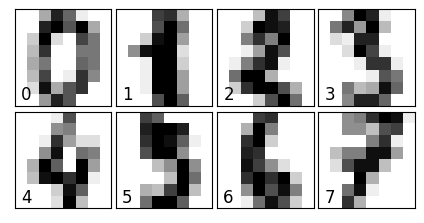

In [67]:
# sklearn 机器学习
digits = datasets.load_digits()
fig = plt.figure(figsize=(4, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))
plt.show()